# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص چهره با روش یادگیری عمیق در Opencv</div>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "model/face/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.9,
    0.3,
    5000
)

image = cv2.imread("images/akhavan.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش خروجی مدل</div>

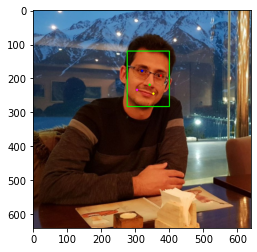

In [2]:
thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
        cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
        cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
        cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
        cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

plt.imshow(image[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تست با وبکم</div>

In [3]:
import cv2

detector = cv2.FaceDetectorYN.create(
    "model/face/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.9,
    0.3,
    5000
)


cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))
detector.setInputSize((width, height))


while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    result = detector.detect(frame)
    thickness=2
    if result[1] is not None:
        for idx, face in enumerate(result[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv2.circle(frame, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv2.circle(frame, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv2.circle(frame, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv2.circle(frame, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv2.circle(frame, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

    cv2.imshow('Webcam', frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()      

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی خروجی مدل روی بزرگترین سلفی جهان!</div>

number of detected faces: 603


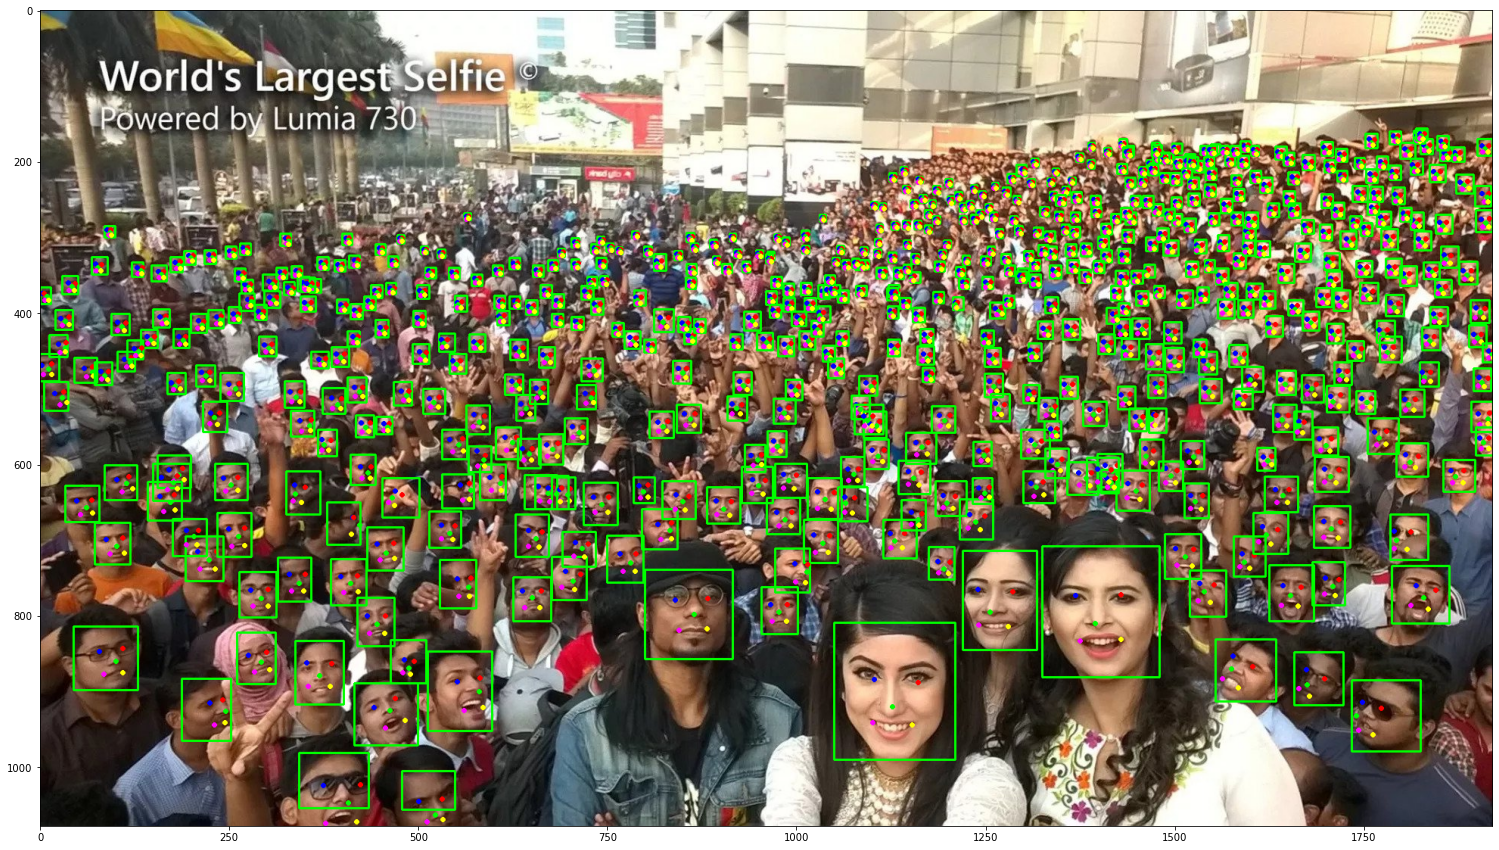

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "model/face/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.5,
    0.5,
    5000
)

image = cv2.imread("images/largest-selfie.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)
print("number of detected faces:", len(result[1]))

thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
        cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
        cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
        cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
        cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

plt.figure(figsize=[30,15])
plt.imshow(image[...,::-1]);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">زمان اجرای مدل:</div>

In [5]:
%timeit detector.detect(image)

285 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


https://docs.opencv.org/4.x/d0/dd4/tutorial_dnn_face.html?msclkid=bbba05a1af3911eca0d1cf4ec0faac6c